In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from numpy.linalg import norm
import sys
from random import seed
from random import randint
from sklearn.metrics import accuracy_score

pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
np.set_printoptions(threshold=sys.maxsize)
seed(1)

np.set_printoptions(precision=10, )
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
%precision 10
!cp -r /content/drive/MyDrive/CS_480_680_DataSets /content

''' 
Dataset for K-nearest neighbour: knn-dataset.zip
Problem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. 
It contains pre-processed black and white images of the digits 5 and 6. 
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Format: there is one row per image and one column per attribute. The class labels are 5 and 6.
The training set is already divided into 10 subsets for 10-fold cross validation.

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Data Set Information:

We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. 
From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 
32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. 
This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 
This reduces dimensionality and gives invariance to small distortions.

To sum up:
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Input matrix of 8x8 where each element is an integer in the range 0..16. 

'''

' \nDataset for K-nearest neighbour: knn-dataset.zip\nProblem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. \nIt contains pre-processed black and white images of the digits 5 and 6. \nEach attribute indicates how many pixels are black in a patch of 4 x 4 pixels.\nFormat: there is one row per image and one column per attribute. The class labels are 5 and 6.\nThe training set is already divided into 10 subsets for 10-fold cross validation.\n\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nData Set Information:\n\nWe used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. \nFrom a total of 43 people, 30 contributed to the training set and different 13 to the test set. \n32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. \nThis generates an input matrix

In [3]:
# train.csv dataSet
train_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData1.csv', header=None)
train_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData2.csv', header=None)
train_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData3.csv', header=None)
train_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData4.csv', header=None)
train_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData5.csv', header=None)
train_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData6.csv', header=None)
train_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData7.csv', header=None)
train_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData8.csv', header=None)
train_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData9.csv', header=None)
train_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData10.csv', header=None)
test_data = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/testData.csv', header=None)

train_1 = (train_1 - train_1.min())/(train_1.max()-train_1.min())
train_2 = (train_2 - train_2.min())/(train_2.max()-train_2.min())
train_3 = (train_3 - train_3.min())/(train_3.max()-train_3.min())
train_4 = (train_4 - train_4.min())/(train_4.max()-train_4.min())
train_5 = (train_5 - train_5.min())/(train_5.max()-train_5.min())
train_6 = (train_6 - train_6.min())/(train_6.max()-train_6.min())
train_7 = (train_7 - train_7.min())/(train_7.max()-train_7.min())
train_8 = (train_8 - train_8.min())/(train_8.max()-train_8.min())
train_9 = (train_9 - train_9.min())/(train_9.max()-train_9.min())
train_10 = (train_10 - train_10.min())/(train_10.max()-train_10.min())
test_data = (test_data - test_data.min())/(test_data.max()-test_data.min())

# Labels dataSet
labels_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels1.csv', header=None)
labels_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels2.csv', header=None)
labels_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels3.csv', header=None)
labels_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels4.csv', header=None)
labels_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels5.csv', header=None)
labels_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels6.csv', header=None)
labels_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels7.csv', header=None)
labels_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels8.csv', header=None)
labels_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels9.csv', header=None)
labels_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels10.csv', header=None)
test_labels = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/testLabels.csv', header=None)

# Replace classes {'5' -> -1 and '6' -> 1}
replace_labels = {5: 0, 6: 1}
rename_features = {0: 'Label'}

labels_1.replace(replace_labels, inplace=True)
labels_2.replace(replace_labels, inplace=True)
labels_3.replace(replace_labels, inplace=True)
labels_4.replace(replace_labels, inplace=True)
labels_5.replace(replace_labels, inplace=True)
labels_6.replace(replace_labels, inplace=True)
labels_7.replace(replace_labels, inplace=True)
labels_8.replace(replace_labels, inplace=True)
labels_9.replace(replace_labels, inplace=True)
labels_10.replace(replace_labels, inplace=True)
test_labels.replace(replace_labels, inplace=True)

labels_1.rename(columns=rename_features, inplace=True)
labels_2.rename(columns=rename_features, inplace=True)
labels_3.rename(columns=rename_features, inplace=True)
labels_4.rename(columns=rename_features, inplace=True)
labels_5.rename(columns=rename_features, inplace=True)
labels_6.rename(columns=rename_features, inplace=True)
labels_7.rename(columns=rename_features, inplace=True)
labels_8.rename(columns=rename_features, inplace=True)
labels_9.rename(columns=rename_features, inplace=True)
labels_10.rename(columns=rename_features, inplace=True)
test_labels.rename(columns=rename_features, inplace=True)

In [4]:
train_set = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10]
labels_set = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_7, labels_8, labels_9, labels_10]

In [5]:
# Lambda from 1 to 30 values sweep
lambda_values = np.arange(0.0, 4.1, 0.1)

# Number of trainingdata splits
k_cross = 10

# List of dataFrames of the training data execluding the training data used for validation 
training_data = []
training_labels = []

# Same for validation data
validation_data = []
validation_labels = []

# Get training data and validation data as list of dataFrames
for i in range(k_cross):
  sub_train = [train_set[index] for index in range(k_cross) if index != i]
  sub_label = [labels_set[index] for index in range(k_cross) if index != i]
  
  # Concatenate all dataframes in the sub_train list to a single dataframe in order
  # to get a single training examples dataFrame with all examples in it.
  training_data.append(pd.concat(sub_train, ignore_index=True))
  training_labels.append(pd.concat(sub_label, ignore_index=True))

  validation_data.append(train_set[i])
  validation_labels.append(labels_set[i])

tot_train_data = pd.concat([training_data[0], validation_data[0]], ignore_index=True)
tot_train_labels = pd.concat([training_labels[0], validation_labels[0]], ignore_index=True)

In [6]:
def sigmoid(w_sig, x_sig):
  '''
  Compute sigmoid(w.T* x) equation and return the result. Note that
  the bias term is embedded inside the w vector
  '''
  return 1 / (1 + np.exp(-1 * np.dot(w_sig.T, x_sig)))

def Get_PHI_Matrix(df_data_gph):
  '''
  This function is a helper for function Get Hessian matrix, It returns
  a phi matrix with shape M features x N examples . However we need to consider 
  the bias term in this equation so the return matrix is (M + 1) x N, where 
  a whole row of ones is added at the very beginning of the return matrix
  '''
  # Get all dataset examples as an array
  phi_ex = df_data_gph.to_numpy().T

  # Get the bias stacked at the 1st row of the phi matrix (M + 1) x N
  return np.vstack((np.ones((1, phi_ex.shape[1])), phi_ex))

def Get_Weighting_Matrix(df_data_wm, weights_wm):
  ''' 
  This function computes the weighting matrix (R) which is used
  in order to calcaulte the Hessian matrix in the following 
  formula -> phi.T * R * phi, where phi is (M + 1) x N and 
  R is a diagonal matrix with the following parameters:
  sigmoid(w.T * x) * (1 - sigmoid(w.T * x)).
  R is an N x N dimensional matrix

  Inputs: dataframe for all training examples, Note that the df is 
  of shape N examples * M features always.
  weights are of shape M x 1 which is a feature column vector.

  '''
  # Number of features and number of examples
  num_features = df_data_wm.shape[1]
  num_examples = df_data_wm.shape[0]

  # Create matrix with only 1s on main diagonal
  R = np.identity(num_examples)

  # Create a list for Rnn diagonal elements.
  Rnn = []

  for index, row in df_data_wm.iterrows():
    # Get features for the current example (M x 1) features
    tmp = np.array(row).reshape(num_features, 1)
    
    # Add bias at the beginning of the feature vector (M+1) x 1
    tmp = np.vstack((1, tmp))

    # Sigmoid scalar value
    sig = np.squeeze(sigmoid(weights_wm, tmp))

    # Diagonal elements are sigmoid * (1 - sigmoid)
    Rnn.append(sig * (1 - sig))

  # R_tmp is used for casting the values to the (N x N) matrix to have a full
  # diagonal matrix with sigma * (1 - sigma) as the elements
  R_tmp = np.array(Rnn).reshape(num_examples, 1)

  # Cast the Coulmn vector to the matrix to get the R matrix
  return R_tmp * R

def Get_Hessian_Matrix(df_data_hs, weights_hs, lambda_val_hs):
  '''
  This function computes the likelihood maximization Hessian matrix used 
  in Newton's algorithm in order to make the update rule for weight vector
  Note: Hessian equation = phi * R * phi.T + lambda * Identity matrix 
  result is of shape (M+1) x (M+1)
  '''
  # Get phi matrix, it's of shape (M + 1) x N
  phi_hs = Get_PHI_Matrix(df_data_hs)
  
  # Get lambda * Identity matrix -> (M + 1 )x (M + 1)
  lambda_mat_hs = np.identity(phi_hs.shape[0]) * lambda_val_hs
  lambda_mat_hs[0][0] = 0

  # Get R matrix, dim N x N
  R_hs = Get_Weighting_Matrix(df_data_hs, weights_hs)

  # Calculate the equation of Hessian matrix; ((M + 1) x N )* (N x N) * (N x (M + 1)) -> (M + 1) x (M + 1)
  return np.dot(np.dot(phi_hs, R_hs), phi_hs.T) + lambda_mat_hs

In [7]:
def get_gradient(true_labels_gr, pred_labels_gr, phi_mat_gr):
  '''
  This function is a helpre for call_gradient. It calculate the equation
  of phi * (y - t) and returns the final gradient column vector with shape
  of (M + 1) x 1
  '''
  # Get true and predected labels
  y_gr = np.array(pred_labels_gr).reshape(true_labels_gr.shape[0], true_labels_gr.shape[1])
  t_gr = np.array(true_labels_gr).reshape(true_labels_gr.shape[0], true_labels_gr.shape[1])
  
  # phi = (M + 1) x N, (y - t) = N x 1 -> result: (M + 1) x 1
  return np.dot(phi_mat_gr, (y_gr - t_gr)) 

def call_gradient(weight_cg, train_df_cg, labels_df_cg, phi_cg):
  '''
  This function calculates the gradient for all training examples and
  has the following equation: phi * (y - t), where phi is a matrix of 
  dim (M + 1) x N, y and t are of dim N x 1. 

  The return is a matrix of shape N x 1 which is the gradient used
  to multiply the inverse of hessian and update the weight vector
  '''
  # Get training examples and number of features 
  num_training_exmpls = train_df_cg.shape[0]
  num_training_features = train_df_cg.shape[1]

  # List to append all the sigmoids calculated
  y_pred_cg = []

  for index, row_example in train_df_cg.iterrows():
    # Get features for the current example (M x 1) features
    tmp = np.array(row_example).reshape(num_training_features, 1)

    # Add bias at the beginning of the feature vector (M+1) x 1
    tmp = np.vstack((1, tmp))

    # Calculate the sigmoid and append it to the list
    y_pred_cg.append(sigmoid(weight_cg, tmp))

  # Get target values from the labels dataframe
  t_cg = labels_df_cg.to_numpy().reshape(num_training_exmpls, 1)

  # Return the gradient, which is a matrix of dim (M + 1) x 1
  return get_gradient(t_cg, y_pred_cg, phi_cg)

In [8]:
def train_logistic(train_df_tr, labels_df_tr, lambd_tr):
  w_tr = np.zeros((65, 1))

  phi_tr = Get_PHI_Matrix(train_df_tr)
  for k_tr in range(1, 10):
    grad_tr = call_gradient(w_tr, train_df_tr, labels_df_tr, phi_tr)
    grad_tr = grad_tr + 2 * lambd_tr * w_tr
    h_tr = Get_Hessian_Matrix(train_df_tr, w_tr, 2 * lambd_tr)
    w_tr = w_tr - 0.7 * np.dot(np.linalg.inv(h_tr), grad_tr)
  return w_tr

def predict_logistic(test_df_lp, w_lp):
  y_pred_lp = []
  for index, row_example in test_df_lp.iterrows():
    # Get features for the current example (M x 1) features
    tmp = np.array(row_example).reshape(test_df_lp.shape[1], 1)
    # Add bias at the beginning of the feature vector (M+1) x 1
    tmp = np.vstack((1, tmp))
    y_pred_lp.append(sigmoid(w_lp, tmp))
    
  return y_pred_lp

In [9]:
def get_logistic_weights(df_traing_data, df_traing_labels, lamb):
    
  weights_final = train_logistic(df_traing_data, df_traing_labels, lamb)

  return weights_final

def test_logistic_regression(df_test, df_labels, tr_weights):
  # Get the predictions using sigmoid activation function for test data
  y_pred = np.array(predict_logistic(df_test, tr_weights))

  # Decision boundary theorem where prob >= 0.5 is class 1
  zeros_class_indeces = y_pred >= 0.5 
  ones_class_indeces = y_pred < 0.5 
  y_pred[zeros_class_indeces] = 1
  y_pred[ones_class_indeces] = 0

  print("Test accuracy: ", accuracy_score(np.array(df_labels), np.array(np.squeeze(y_pred))) * 100)

  return y_pred

In [10]:
accuracy = []
list_acc = []

# Choose a certain lambda value
for lamb in lambda_values:
  # Use 10-fold cross validation
  accuracy = []

  # Loop over all the k-validations
  for k in range(1, 10):
    
    # Get weights from training data
    w_training = train_logistic(training_data[k], training_labels[k], lamb)

    # Get the predictions using sigmoid activation function for test data
    y_pred = np.array(predict_logistic(validation_data[k], w_training))
    
    # Decision boundary theorem where prob >= 0.5 is class 1
    zeros_class_indeces = y_pred >= 0.5 
    ones_class_indeces = y_pred < 0.5 
    y_pred[zeros_class_indeces] = 1
    y_pred[ones_class_indeces] = 0

    accuracy.append(accuracy_score(np.array(validation_labels[k]), np.array(np.squeeze(y_pred))))
  
  list_acc.append(np.sum(np.array(accuracy))/k_cross)

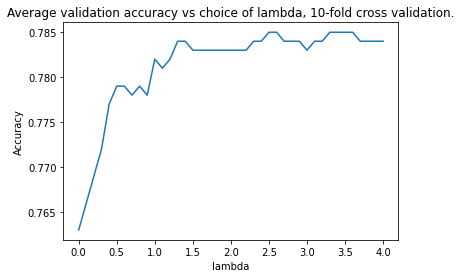

In [11]:
plt.title("Average validation accuracy vs choice of lambda, 10-fold cross validation.")
plt.xlabel("lambda")
plt.ylabel("Accuracy")
plt.plot(lambda_values, list_acc)
plt.show()

In [12]:
plot_me = {}
i = 0
for ind in list_acc:
  lambpl = lambda_values[i]
  i += 1
  plot_me[lambpl] = ind

  
ordered = {k: v for k, v in sorted(plot_me.items(), key=lambda item: item[1], reverse=True)}
plot_o = list(ordered.items())
print("Best lambda is at: ", plot_o[0][0], ", With average validation Accuracy: ",  plot_o[0][1])
lambda_optimum = plot_o[0][0]

Best lambda is at:  2.5 , With average validation Accuracy:  0.785


Test accuracy:  91.81818181818183


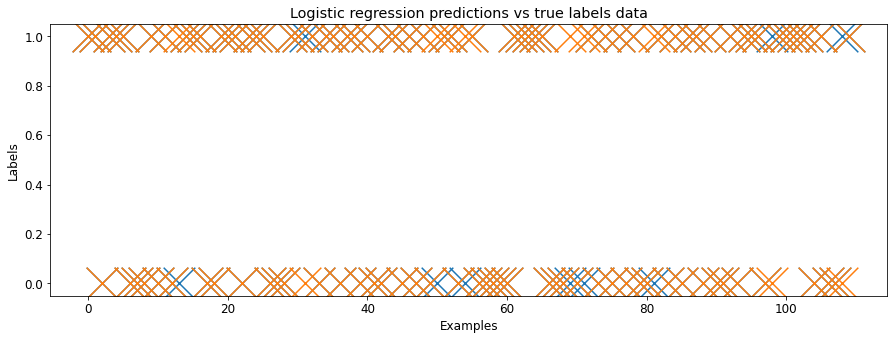

In [13]:
def LogisticAPI(trainDF, labelsDF, testDF, testLabelsDF, optimum_lambda):

  true_weights = get_logistic_weights(trainDF, labelsDF, optimum_lambda)
  fina_labels_test = test_logistic_regression(testDF, testLabelsDF, true_weights)

  fig = plt .figure(figsize=(15, 5))
  plt.rcParams.update({'font.size': 12})
  plt.ylabel('Labels')
  plt.xlabel('Examples')
  plt.title('Logistic regression predictions vs true labels data')

  plt.scatter(np.arange(110), testLabelsDF, marker= "x", s = 1000)
  plt.scatter(np.arange(110), np.squeeze(fina_labels_test), marker= "x", s = 1000)
  plt.show()

LogisticAPI(tot_train_data, tot_train_labels, test_data, test_labels, lambda_optimum)